# A Blend Example Taylor 4.6
A petroleum company produces three grades of motor oil—super, premium, and extra—from
three components. The company wants to determine the optimal mix of the three components in
each grade of motor oil that will maximize profit. The maximum quantities available of each
component and their cost per barrel are as follows:

<br>
<table>
  <tr>
    <th> Component </th>
    <th> Maximum Barrels Available/Day </th>
    <th> Cost/Barrel </th>
  </tr>
  <tr>
    <th> 1 </th>
    <th> 4,500 </th>
    <th> $12 </th>
  </tr>
  <tr>
    <th> 2 </th>
    <th> 2,700 </th>
    <th> $10 </th>
  </tr>
  <tr>
    <th> 3 </th>
    <th> 3,500 </th>
    <th> $14 </th>
  </tr>
</table>

To ensure the appropriate blend, each grade has certain general specifications. Each grade
must have a minimum amount of component 1 plus a combination of other components, as
follows:

<br>
<table>
  <tr>
    <th> Grade </th>
    <th> Component Specifications </th>
    <th> Selling Price/Barrel </th>
  </tr>
  <tr>
    <th> Super </th>
    <th> At least 50% of 1 <br>Not more than 30% of 2 </th>
    <th> $23 </th>
  </tr>
  <tr>
    <th> Premium </th>
    <th> At least 40% of 1 <br>Not more than 25% of 3 </th>
    <th> $20 </th>
  </tr>
  <tr>
    <th> Extra </th>
    <th> At least 60% of 1<br>At least 10% of 3 </th>
    <th> $18 </th>
  </tr>
</table>

The company wants to produce at least 3,000 barrels of each grade of motor oil.


In [26]:
from docplex.mp.model import Model
import random
import matplotlib.pyplot as plt

## Optimization

### Employing CPLEX

In [27]:
opt_mod = Model(name = "Taylor 4.6")

s1=opt_mod.continuous_var(name='s1',lb=0)
s2=opt_mod.continuous_var(name='s2',lb=0)
s3=opt_mod.continuous_var(name='s3',lb=0)
p1=opt_mod.continuous_var(name='p1',lb=0)
p2=opt_mod.continuous_var(name='p2',lb=0)
p3=opt_mod.continuous_var(name='p3',lb=0)
e1=opt_mod.continuous_var(name='e1',lb=0)
e2=opt_mod.continuous_var(name='e2',lb=0)
e3=opt_mod.continuous_var(name='e3',lb=0)
   
c1=opt_mod.add_constraint(s1+p1+e1<= 4500,ctname='c1')
c2=opt_mod.add_constraint(s2+p2+e2<=2700 ,ctname='c2')
c3=opt_mod.add_constraint(s3+p3+e3<=3500,ctname='c3')
c4=opt_mod.add_constraint(0.5*s1-0.5*s2-0.5*s3>=0,ctname='c4')
c5=opt_mod.add_constraint(0.7*s2-0.3*s1-0.3*s3<=0,ctname='c5')
c6=opt_mod.add_constraint(0.6*p1-0.4*p2-0.4*p3>=0,ctname='c6')
c7=opt_mod.add_constraint(0.75*p3-0.25*p1-0.25*p2<=0,ctname='c7')
c8=opt_mod.add_constraint(0.4*e1-0.6*e2-0.6*e3>=0,ctname='c8')
c9=opt_mod.add_constraint(0.9*e2-0.1*e1-0.1*e3>=0,ctname='c9')
c10=opt_mod.add_constraint(s1+s2+s3>=3000,ctname='c10')
c11=opt_mod.add_constraint(p1+p2+p3>=3000,ctname='c11')
c12=opt_mod.add_constraint(e1+e2+e3>=3000,ctname='c12')
obj_function = 23*(s1+s2+s3) + 20*(p1+p2+p3) + 18*(e1+e2+e3)-12*(s1+p1+e1)-10*(s2+p2+e2)-14*(s3+p3+e3)

opt_mod.maximize(obj_function)

opt_mod.solve()

docplex.mp.solution.SolveSolution(obj=76800,values={s1:1500,s3:1500,p1:1..

In [28]:
print('obj = ', opt_mod.objective_value)

for value in opt_mod.iter_continuous_vars():
  print(value, ' --> ', value.solution_value)

obj =  76800.0
s1  -->  1500.0
s2  -->  0
s3  -->  1500.0
p1  -->  1200.0
p2  -->  1500.0
p3  -->  300.0
e1  -->  1800.0
e2  -->  1200.0
e3  -->  0


### Employing pywraplp

In [29]:
from ortools.linear_solver import pywraplp

In [30]:
solver = pywraplp.Solver.CreateSolver('GLOP')

s1 = solver.NumVar(0, solver.infinity(), 's1')
s2 = solver.NumVar(0, solver.infinity(), 's2')
s3 = solver.NumVar(0, solver.infinity(), 's3')
p1 = solver.NumVar(0, solver.infinity(), 'p1')
p2 = solver.NumVar(0, solver.infinity(), 'p2')
p3 = solver.NumVar(0, solver.infinity(), 'p3')
e1 = solver.NumVar(0, solver.infinity(), 'e1')
e2 = solver.NumVar(0, solver.infinity(), 'e2')
e3 = solver.NumVar(0, solver.infinity(), 'e3')

obj_function = 23*(s1+s2+s3) + 20*(p1+p2+p3) + 18*(e1+e2+e3)-12*(s1+p1+e1)-10*(s2+p2+e2)-14*(s3+p3+e3)

solver.Maximize(obj_function)

c1 = solver.Add(s1+p1+e1<= 4500)
c2 = solver.Add(s2+p2+e2<=2700)
c3 = solver.Add(s3+p3+e3<=3500)
c4 = solver.Add(0.5*s1-0.5*s2-0.5*s3>=0)
c5 = solver.Add(0.7*s2-0.3*s1-0.3*s3<=0)
c6 = solver.Add(0.6*p1-0.4*p2-0.4*p3>=0)
c7 = solver.Add(0.75*p3-0.25*p1-0.25*p2<=0)
c8 = solver.Add(0.4*e1-0.6*e2-0.6*e3>=0)
c9 = solver.Add(0.9*e2-0.1*e1-0.1*e3>=0)
c10 = solver.Add(s1+s2+s3>=3000)
c11 = solver.Add(p1+p2+p3>=3000)
c12 = solver.Add(e1+e2+e3>=3000)

results = solver.Solve()


In [31]:
if results == pywraplp.Solver.OPTIMAL:
    print("Solution:")
    print(f"Objective value = {solver.Objective().Value():0.1f}")
    print(f"s1 = {s1.solution_value():0.1f}")
    print(f"s2 = {s2.solution_value():0.1f}")
    print(f"s3 = {s3.solution_value():0.1f}")
    print(f"p1 = {p1.solution_value():0.1f}")
    print(f"p2 = {p2.solution_value():0.1f}")
    print(f"p3 = {p3.solution_value():0.1f}")
    print(f"e1 = {e1.solution_value():0.1f}")
    print(f"e2 = {e2.solution_value():0.1f}")
    print(f"e3 = {e3.solution_value():0.1f}")
else:
    print("The problem does not have an optimal solution.")

Solution:
Objective value = 76800.0
s1 = 1500.0
s2 = 600.0
s3 = 900.0
p1 = 1200.0
p2 = 1800.0
p3 = 0.0
e1 = 1800.0
e2 = 300.0
e3 = 900.0


## SIMULATION
### Case1
The simulation done on the problem tries to analyze the impact of the variation on the selling price of the extra grade motor oil. Changing the static value of $18 the barrell to a price that ranges from $16 to $25. The simulation will be ran over 1000 to see the behaviour of the optimum values of each components and the new maximum profits. 

In [32]:
replicas = 1000
rev = 0
vals1=[]
vals2=[]  
vals3=[]
valp1=[]
valp2=[]
valp3=[]
vale1=[]
vale2=[]
vale3=[]
valobj=[]

In [33]:
for i in range(replicas):
    rev = random.randint(16, 25)
    
    opt_mod = Model(name = "Taylor 4.6")
    
    s1=opt_mod.continuous_var(name='s1',lb=0)
    s2=opt_mod.continuous_var(name='s2',lb=0)
    s3=opt_mod.continuous_var(name='s3',lb=0)
    p1=opt_mod.continuous_var(name='p1',lb=0)
    p2=opt_mod.continuous_var(name='p2',lb=0)
    p3=opt_mod.continuous_var(name='p3',lb=0)
    e1=opt_mod.continuous_var(name='e1',lb=0)
    e2=opt_mod.continuous_var(name='e2',lb=0)
    e3=opt_mod.continuous_var(name='e3',lb=0)   
    
    c1=opt_mod.add_constraint(s1+p1+e1<= 4500,ctname='c1')
    c2=opt_mod.add_constraint(s2+p2+e2<=2700 ,ctname='c2')
    c3=opt_mod.add_constraint(s3+p3+e3<=3500,ctname='c3')
    c4=opt_mod.add_constraint(0.5*s1-0.5*s2-0.5*s3>=0,ctname='c4')
    c5=opt_mod.add_constraint(0.7*s2-0.3*s1-0.3*s3<=0,ctname='c5')
    c6=opt_mod.add_constraint(0.6*p1-0.4*p2-0.4*p3>=0,ctname='c6')
    c7=opt_mod.add_constraint(0.75*p3-0.25*p1-0.25*p2<=0,ctname='c7')
    c8=opt_mod.add_constraint(0.4*e1-0.6*e2-0.6*e3>=0,ctname='c8')
    c9=opt_mod.add_constraint(0.9*e2-0.1*e1-0.1*e3>=0,ctname='c9')
    c10=opt_mod.add_constraint(s1+s2+s3>=3000,ctname='c10')
    c11=opt_mod.add_constraint(p1+p2+p3>=3000,ctname='c11')
    c12=opt_mod.add_constraint(e1+e2+e3>=3000,ctname='c12')
    
    obj_function = 23*(s1+s2+s3) + 20*(p1+p2+p3) + rev*(e1+e2+e3)-12*(s1+p1+e1)-10*(s2+p2+e2)-14*(s3+p3+e3)
    
    opt_mod.maximize(obj_function)
    
    opt_mod.solve()
    
    vals1.append(s1.solution_value)
    vals2.append(s2.solution_value)
    vals3.append(s3.solution_value)
    valp1.append(p1.solution_value)
    valp2.append(p2.solution_value)
    valp3.append(p3.solution_value)
    vale1.append(e1.solution_value)
    vale2.append(e2.solution_value)
    vale3.append(e3.solution_value)
    valobj.append(opt_mod.objective_value)

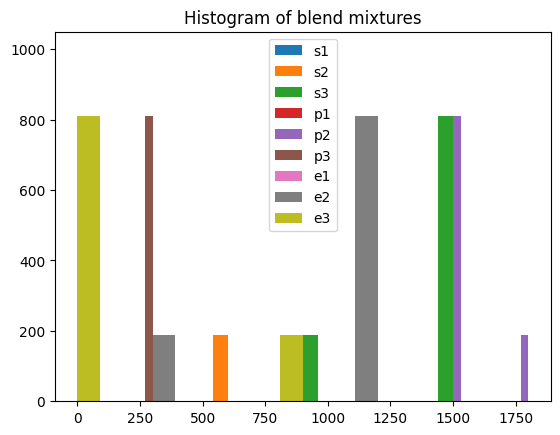

In [34]:
plt.hist(vals1)
plt.hist(vals2)
plt.hist(vals3)
plt.hist(valp1)
plt.hist(valp2)
plt.hist(valp3)
plt.hist(vale1)
plt.hist(vale2)
plt.hist(vale3)
legend = ['s1','s2','s3','p1','p2','p3','e1','e2','e3']
plt.title('Histogram of blend mixtures')
plt.legend(legend)
plt.show()

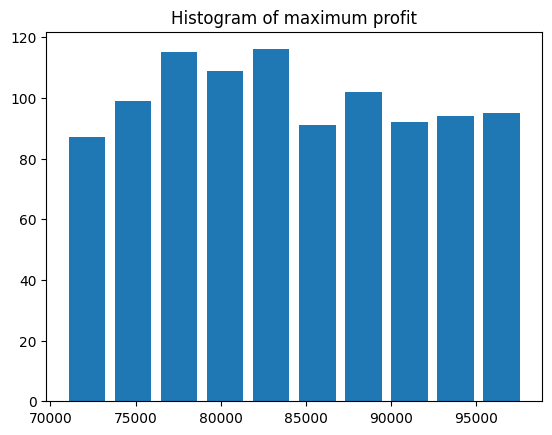

In [35]:
plt.hist(valobj,rwidth=0.8)
plt.title('Histogram of maximum profit')
plt.show()

In [36]:
opt_mod.print_solution()

objective: 94800.000
status: OPTIMAL_SOLUTION(2)
  s1=1500.000
  s2=600.000
  s3=900.000
  p1=1200.000
  p2=1800.000
  e1=1800.000
  e2=300.000
  e3=900.000


### Case2
On this case the changing value will be for the premium grading oil, in a range from $18 to $24 instead of the $20 static value. The simulation will be ran over 1000 to see the behaviour of the optimum values of each components and the new maximum profits. 

In [37]:
rev = 0
vals1=[]
vals2=[]  
vals3=[]
valp1=[]
valp2=[]
valp3=[]
vale1=[]
vale2=[]
vale3=[]
valobj=[]

In [38]:
for i in range(replicas):
    rev = random.randint(18, 24)
    
    opt_mod = Model(name = "Taylor 4.6")
    
    s1=opt_mod.continuous_var(name='s1',lb=0)
    s2=opt_mod.continuous_var(name='s2',lb=0)
    s3=opt_mod.continuous_var(name='s3',lb=0)
    p1=opt_mod.continuous_var(name='p1',lb=0)
    p2=opt_mod.continuous_var(name='p2',lb=0)
    p3=opt_mod.continuous_var(name='p3',lb=0)
    e1=opt_mod.continuous_var(name='e1',lb=0)
    e2=opt_mod.continuous_var(name='e2',lb=0)
    e3=opt_mod.continuous_var(name='e3',lb=0)   
    
    c1=opt_mod.add_constraint(s1+p1+e1<= 4500,ctname='c1')
    c2=opt_mod.add_constraint(s2+p2+e2<=2700 ,ctname='c2')
    c3=opt_mod.add_constraint(s3+p3+e3<=3500,ctname='c3')
    c4=opt_mod.add_constraint(0.5*s1-0.5*s2-0.5*s3>=0,ctname='c4')
    c5=opt_mod.add_constraint(0.7*s2-0.3*s1-0.3*s3<=0,ctname='c5')
    c6=opt_mod.add_constraint(0.6*p1-0.4*p2-0.4*p3>=0,ctname='c6')
    c7=opt_mod.add_constraint(0.75*p3-0.25*p1-0.25*p2<=0,ctname='c7')
    c8=opt_mod.add_constraint(0.4*e1-0.6*e2-0.6*e3>=0,ctname='c8')
    c9=opt_mod.add_constraint(0.9*e2-0.1*e1-0.1*e3>=0,ctname='c9')
    c10=opt_mod.add_constraint(s1+s2+s3>=3000,ctname='c10')
    c11=opt_mod.add_constraint(p1+p2+p3>=3000,ctname='c11')
    c12=opt_mod.add_constraint(e1+e2+e3>=3000,ctname='c12')
    
    obj_function = 23*(s1+s2+s3) + rev*(p1+p2+p3) + 18*(e1+e2+e3)-12*(s1+p1+e1)-10*(s2+p2+e2)-14*(s3+p3+e3)
    
    opt_mod.maximize(obj_function)
    
    opt_mod.solve()
    
    vals1.append(s1.solution_value)
    vals2.append(s2.solution_value)
    vals3.append(s3.solution_value)
    valp1.append(p1.solution_value)
    valp2.append(p2.solution_value)
    valp3.append(p3.solution_value)
    vale1.append(e1.solution_value)
    vale2.append(e2.solution_value)
    vale3.append(e3.solution_value)
    valobj.append(opt_mod.objective_value)

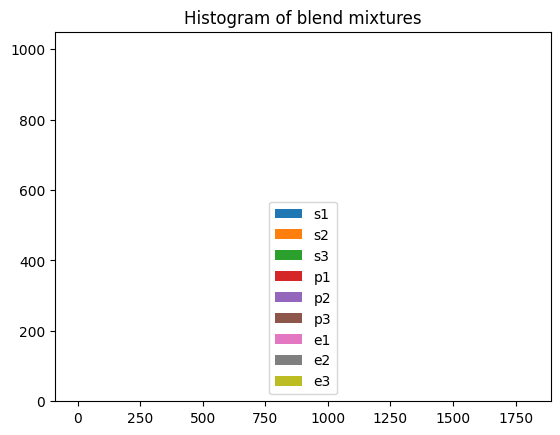

In [39]:
plt.clf
plt.hist(vals1)
plt.hist(vals2)
plt.hist(vals3)
plt.hist(valp1)
plt.hist(valp2)
plt.hist(valp3)
plt.hist(vale1)
plt.hist(vale2)
plt.hist(vale3)
legend = ['s1','s2','s3','p1','p2','p3','e1','e2','e3']
plt.title('Histogram of blend mixtures')
plt.legend(legend)
plt.show()

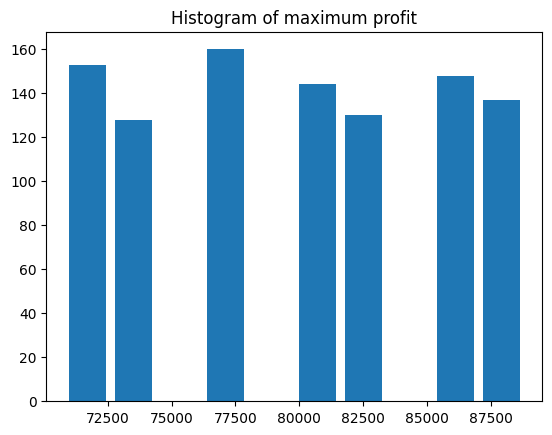

In [40]:
plt.hist(valobj,rwidth=0.8)
plt.title('Histogram of maximum profit')
plt.show()

In [41]:
opt_mod.print_solution()

objective: 82800.000
status: OPTIMAL_SOLUTION(2)
  s1=1500.000
  s3=1500.000
  p1=1200.000
  p2=1500.000
  p3=300.000
  e1=1800.000
  e2=1200.000


### Case3

On this case the changing value will be for the super grading oil, in a range from $20 to $26 instead of the $23 static value. The simulation will be ran over 1000 to see the behaviour of the optimum values of each components and the new maximum profits. 

In [42]:
rev = 0
vals1=[]
vals2=[]  
vals3=[]
valp1=[]
valp2=[]
valp3=[]
vale1=[]
vale2=[]
vale3=[]
valobj=[]

In [43]:
for i in range(replicas):
    rev = random.randint(20, 26)
    
    opt_mod = Model(name = "Taylor 4.6")
    
    s1=opt_mod.continuous_var(name='s1',lb=0)
    s2=opt_mod.continuous_var(name='s2',lb=0)
    s3=opt_mod.continuous_var(name='s3',lb=0)
    p1=opt_mod.continuous_var(name='p1',lb=0)
    p2=opt_mod.continuous_var(name='p2',lb=0)
    p3=opt_mod.continuous_var(name='p3',lb=0)
    e1=opt_mod.continuous_var(name='e1',lb=0)
    e2=opt_mod.continuous_var(name='e2',lb=0)
    e3=opt_mod.continuous_var(name='e3',lb=0)   
    
    c1=opt_mod.add_constraint(s1+p1+e1<= 4500,ctname='c1')
    c2=opt_mod.add_constraint(s2+p2+e2<=2700 ,ctname='c2')
    c3=opt_mod.add_constraint(s3+p3+e3<=3500,ctname='c3')
    c4=opt_mod.add_constraint(0.5*s1-0.5*s2-0.5*s3>=0,ctname='c4')
    c5=opt_mod.add_constraint(0.7*s2-0.3*s1-0.3*s3<=0,ctname='c5')
    c6=opt_mod.add_constraint(0.6*p1-0.4*p2-0.4*p3>=0,ctname='c6')
    c7=opt_mod.add_constraint(0.75*p3-0.25*p1-0.25*p2<=0,ctname='c7')
    c8=opt_mod.add_constraint(0.4*e1-0.6*e2-0.6*e3>=0,ctname='c8')
    c9=opt_mod.add_constraint(0.9*e2-0.1*e1-0.1*e3>=0,ctname='c9')
    c10=opt_mod.add_constraint(s1+s2+s3>=3000,ctname='c10')
    c11=opt_mod.add_constraint(p1+p2+p3>=3000,ctname='c11')
    c12=opt_mod.add_constraint(e1+e2+e3>=3000,ctname='c12')
    
    obj_function = rev*(s1+s2+s3) + 20*(p1+p2+p3) + 18*(e1+e2+e3)-12*(s1+p1+e1)-10*(s2+p2+e2)-14*(s3+p3+e3)
    
    opt_mod.maximize(obj_function)
    
    opt_mod.solve()
    
    vals1.append(s1.solution_value)
    vals2.append(s2.solution_value)
    vals3.append(s3.solution_value)
    valp1.append(p1.solution_value)
    valp2.append(p2.solution_value)
    valp3.append(p3.solution_value)
    vale1.append(e1.solution_value)
    vale2.append(e2.solution_value)
    vale3.append(e3.solution_value)
    valobj.append(opt_mod.objective_value)

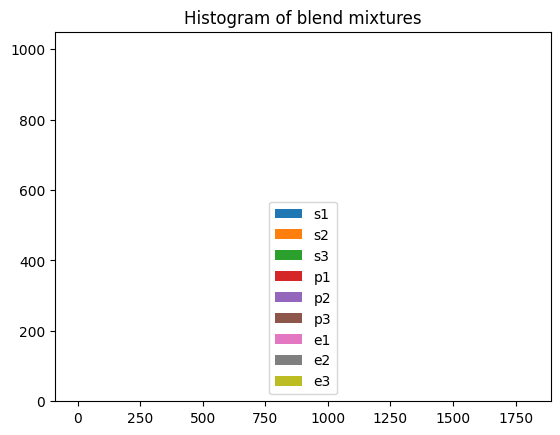

In [44]:
plt.clf()
plt.hist(vals1)
plt.hist(vals2)
plt.hist(vals3)
plt.hist(valp1)
plt.hist(valp2)
plt.hist(valp3)
plt.hist(vale1)
plt.hist(vale2)
plt.hist(vale3)
legend = ['s1','s2','s3','p1','p2','p3','e1','e2','e3']
plt.title('Histogram of blend mixtures')
plt.legend(legend)
plt.show()

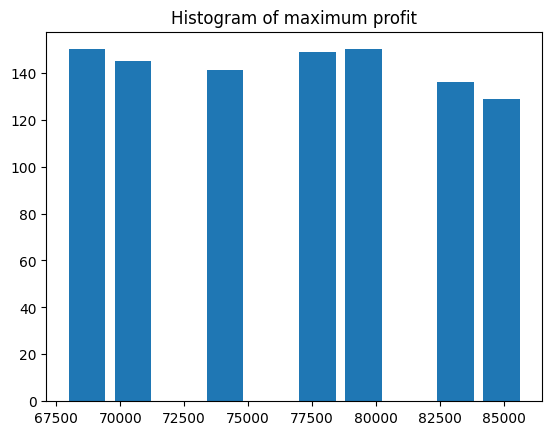

In [45]:
plt.hist(valobj,rwidth=0.8)
plt.title('Histogram of maximum profit')
plt.show()

In [46]:
opt_mod.print_solution()

objective: 82800.000
status: OPTIMAL_SOLUTION(2)
  s1=1500.000
  s3=1500.000
  p1=1200.000
  p2=1500.000
  p3=300.000
  e1=1800.000
  e2=1200.000
